# **Prevendo a Qualidade do Vinho Branco**

**Objetivo:**
* Construir um modelo de Machine Learning capaz de prever a qualidade do vinho branco.

### **1. Introdução**

<p align="justify">
Neste projeto, utilizando técnicas de análise de dados e aprendizado de máquina, nosso objetivo é criar um modelo preditivo capaz de avaliar a qualidade do vinho com precisão, considerando parâmetros como teor alcoólico, acidez, concentração de açúcar e outros fatores determinantes. Utilizaremos o PyCaret para escolha do modelo que melhor se adequa ao conjunto de dados.

In [ ]:
# Carregando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
sns.set()

In [ ]:
# Carregando base de dados

dados = pd.read_csv('/content/drive/MyDrive/Ciência de Dados com Python/Projetos/Dados/winequality-white.csv', sep = ';')

In [ ]:
# Visualizando dados

dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### **2. Análise Exploratória de Dados**

In [ ]:
# Informações sobre o dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Verificando a existência de dados faltantes

dados.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Descritiva dos dados

dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**OBS 1:** a menor nota atribuida a qualidade de um vinho é 3 e a maior é 9.

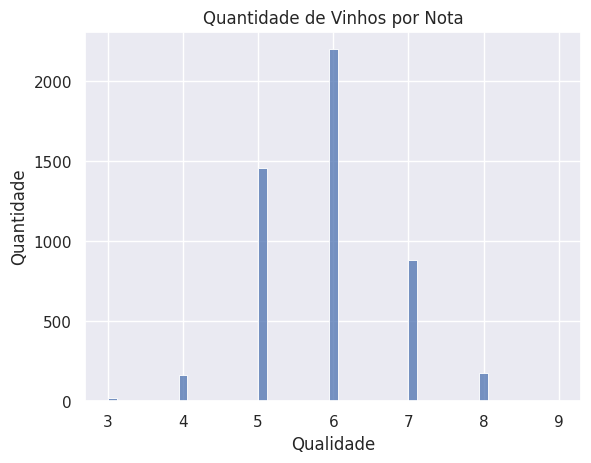

In [ ]:
# Visualizando distribição das "classes"

## Configurando gráfico
sns.histplot(data = dados,
            x = 'quality')

## Configurando labels e título do gráfico
plt.title('Quantidade de Vinhos por Nota')
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')

## Plotando gráfico
plt.show();

**OBS 2:** a maior quantidade de vinhos são classificados entre as notas 5 e 7;

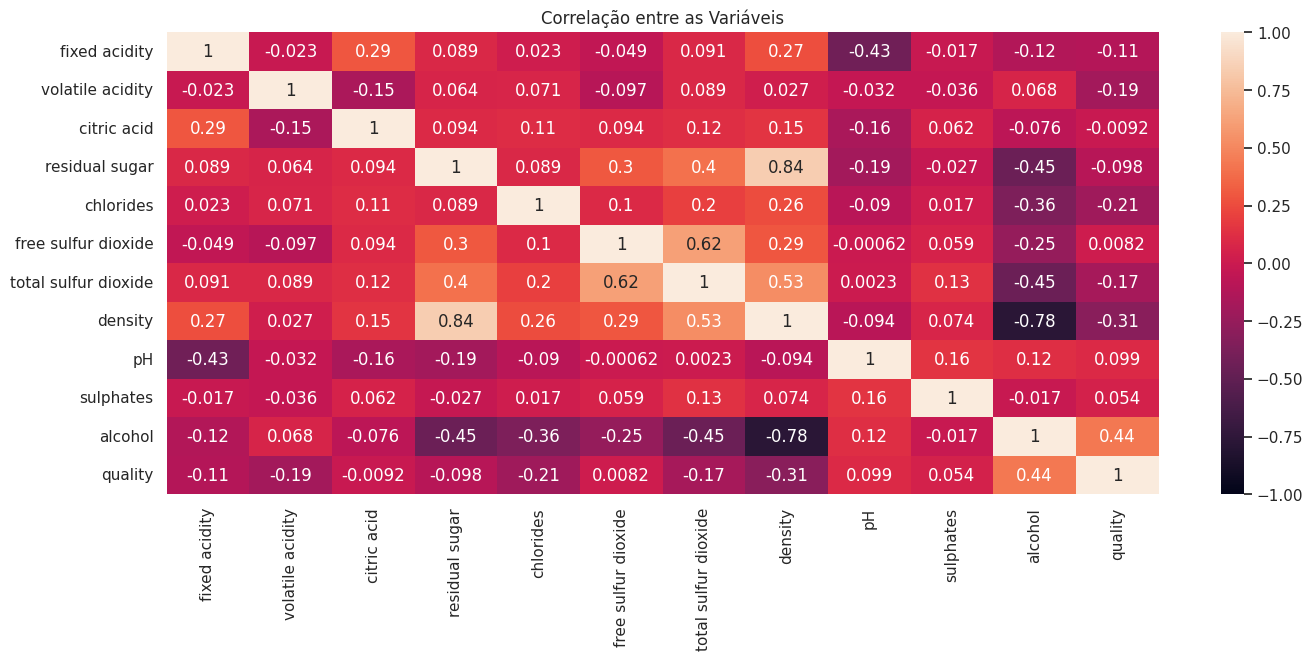

In [ ]:
# Verificando a correlação entre as variáveis

## Definindo tamanho da figura
plt.figure(figsize = (16, 6))

## Configurando gráfico
sns.heatmap(dados.corr(),
            vmin = -1,
            vmax = 1,
            annot = True)

## Definindo título do gráfico
plt.title('Correlação entre as Variáveis')

## Plotando gráfico
plt.show()

**OBS 3:** as variável alcohol tem uma forte correção com a qualidade do vinho.

### **3. Pré-Processamento de Dados**

In [ ]:
# Separando os dados em previsores e classe

previsores = dados.drop('quality', axis = 1)
classe = dados['quality']

In [ ]:
# Verificando shape dos dados

print(previsores.shape)
print(classe.shape)

(4898, 11)
(4898,)


In [ ]:
# Dividindo os dados em treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(previsores,
                                                        classe,
                                                        test_size = 0.3,
                                                        random_state = 0)

In [ ]:
# Verificando shape dos dados

print(X_treino.shape)
print(y_treino.shape)
print(X_teste.shape)
print(y_teste.shape)

(3428, 11)
(3428,)
(1470, 11)
(1470,)


### **4. Construindo o Modelo**

**4.1 Definindo modelo a ser usado com o PyCaret**

In [ ]:
# Instalando biblioteca

!pip install pycaret

In [ ]:
# Carregando biblioteca

from pycaret.classification import *

In [ ]:
# Escolhendo o algoritmo mais adequado para o estudo

clf = setup(dados, target = "quality", session_id = 123)
compare_models()

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6666,0.3417,0.6666,0.6741,0.6527,0.4778,0.4855,0.7460
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6718,0.6509,0.4743,0.4828,0.6490
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.6130
lightgbm,Light Gradient Boosting Machine,0.6389,0.3302,0.6389,0.6365,0.6287,0.4447,0.4477,3.5270
gbc,Gradient Boosting Classifier,0.5741,0.3081,0.5741,0.5706,0.5570,0.3305,0.3382,5.2740
dt,Decision Tree Classifier,0.5694,0.2710,0.5694,0.5688,0.5682,0.3630,0.3633,0.1940
lda,Linear Discriminant Analysis,0.5239,0.2833,0.5239,0.5079,0.4991,0.2416,0.2518,0.0650
ridge,Ridge Classifier,0.5216,0.0000,0.5216,0.4512,0.4478,0.1941,0.2216,0.0710
lr,Logistic Regression,0.5134,0.2788,0.5134,0.4698,0.4658,0.1996,0.2155,3.1370
knn,K Neighbors Classifier,0.4696,0.2615,0.4696,0.4519,0.4535,0.1784,0.1803,0.1890


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**OBS 4:** a partir dos resultados obtidos utilizando o PyCaret, o melhor modelo a ser utilizado é o Random Forest. Vale ressaltar que o Extra Tree Classifier apresentou resultado bem próximos aos do Random Forest em todas as métricas.

**4.2 Construindo modelo**

In [ ]:
# Carregando biblioteca

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instânciando modelo

modelo = RandomForestClassifier()

In [ ]:
# Treinando o modelo

modelo.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
# Aplicando aos dados de teste

y_predito = modelo.predict(X_teste)

### **5. Avaliando Modelo**

In [ ]:
# Métricas do Modelo

print(classification_report(y_teste, y_predito))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.88      0.12      0.21        60
           5       0.70      0.66      0.68       458
           6       0.63      0.81      0.71       630
           7       0.70      0.51      0.59       267
           8       0.81      0.37      0.51        46

    accuracy                           0.66      1470
   macro avg       0.62      0.41      0.45      1470
weighted avg       0.68      0.66      0.65      1470



### **6. Considerações Finais**

<p align="justify">
Após o carregamento, análise exploratória e pré-processamento dos dados, se fez uso do PyCaret para escolha do modelo que melhor se adequava ao conjunto de dados. O escolhido foi o Random Forest. Com o modelo já escolhido foi realizado o treinamento do mesmo e após isso, aplicado aos dados de teste para realizar previsões. Feito isso, buscou-se avaliar o mesmo a partir das métricas precision, recall, f1-score e accuracy. O resultado delas mostrou que quanto maior é o número de dados (vinhos) em uma classe (notas) o modelo tende a classificar melhor. No geral, o mesmo apresenta um resultado que pode ser considerado interessante, entretando, a aplicação de técnicas na etapa de pré-processamento de dados, a realização da validação cruzada ou o tunnig do modelo, pode ajudar na melhora do desempenho de mesmo.